In [ ]:
from google.colab import files

uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving results.csv to results.csv
Загружен файл results.csv


Saving results.csv to results (2).csv


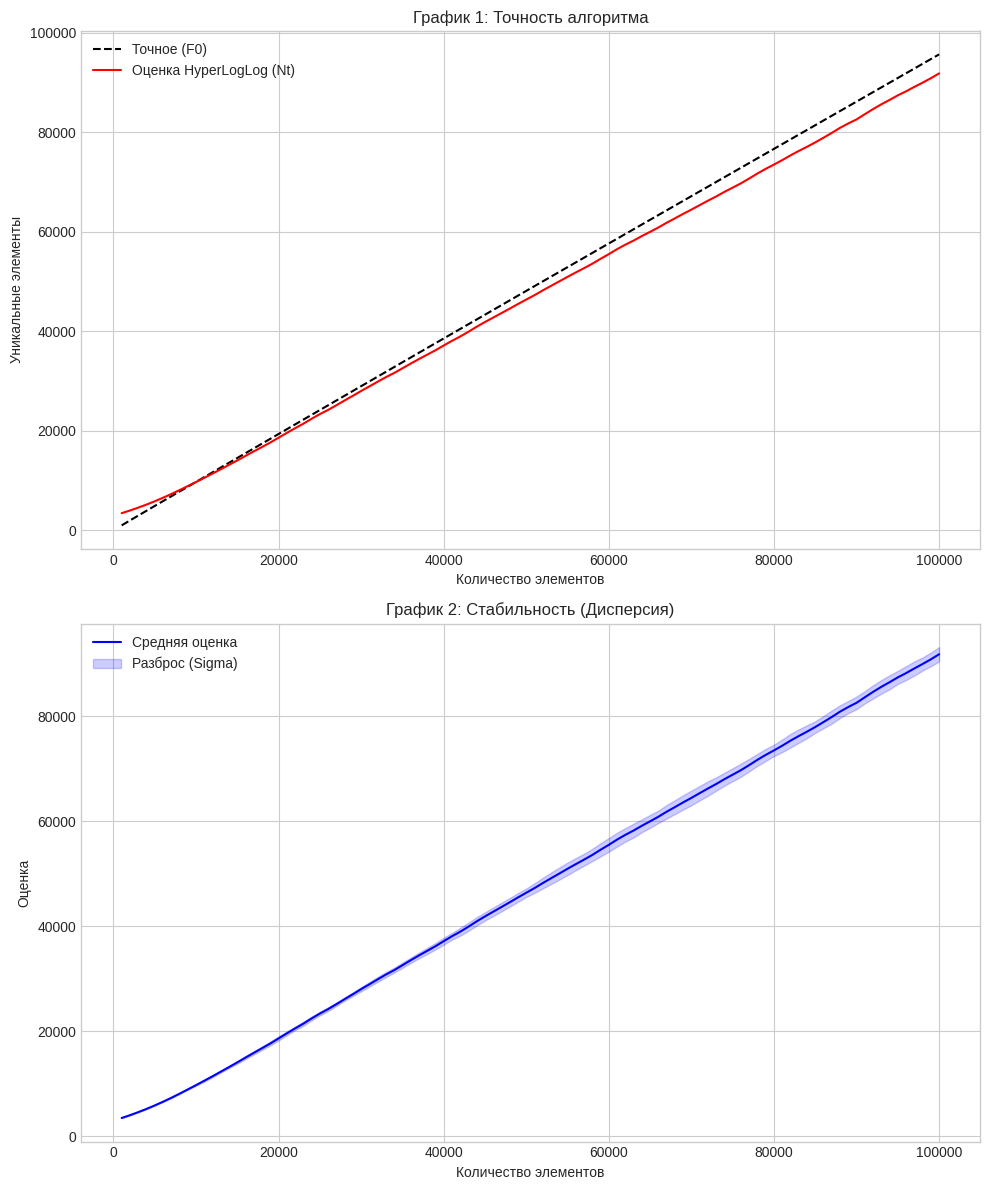

Результаты
Шаг: 100000
Точное кол-во: 95648.1
Оценка HLL: 91828.9
Ошибка: 3819.2
Ошибка (%): 3.99%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# график 1
ax1.plot(df['Шаг'], df['Точное_Среднее'], label='Точное (F0)', color='black', linestyle='--')

ax1.plot(df['Шаг'], df['Оценка_Среднее'], label='Оценка HyperLogLog (Nt)', color='red')

ax1.set_title('График 1: Точность алгоритма')
ax1.set_xlabel('Количество элементов')
ax1.set_ylabel('Уникальные элементы')
ax1.legend()

# график 2
ax2.plot(df['Шаг'], df['Оценка_Среднее'], label='Средняя оценка', color='blue')

ax2.fill_between(df['Шаг'], df['Нижняя_Граница'], df['Верхняя_Граница'],
                 color='blue', alpha=0.2, label='Разброс (Sigma)')

ax2.set_title('График 2: Стабильность (Дисперсия)')
ax2.set_xlabel('Количество элементов')
ax2.set_ylabel('Оценка')
ax2.legend()

plt.tight_layout()
plt.show()

last = df.iloc[-1]
print("Результаты")
print(f"Шаг: {int(last['Шаг'])}")
print(f"Точное кол-во: {last['Точное_Среднее']:.1f}")
print(f"Оценка HLL: {last['Оценка_Среднее']:.1f}")
print(f"Ошибка: {abs(last['Оценка_Среднее'] - last['Точное_Среднее']):.1f}")
print(f"Ошибка (%): {abs(last['Оценка_Среднее'] - last['Точное_Среднее']) / last['Точное_Среднее'] * 100:.2f}%")